In [2]:
import pandas as pd
from sklearn import preprocessing
from neupy import environment
from sklearn.model_selection import train_test_split
from neupy import environment

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
G:\anaconda\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


#### Select the top 10K training records

In [15]:
train_df = pd.read_csv("data/train_70.0.csv")
#train_df = train_df.head(10000)
target_training = train_df.loc[:,"shares"]

#### Data discovery - relation between no of shares and the day of the week

In [16]:
day_of_week_columns = [" weekday_is_monday", " weekday_is_tuesday", " weekday_is_wednesday"," weekday_is_thursday"," weekday_is_friday"," weekday_is_saturday", " weekday_is_sunday"]
share_by_weekday = [0]*len(day_of_week_columns)
print(train_df.shape)
for idx, row in train_df.iterrows():
    for day_no, day_of_week_column in enumerate(day_of_week_columns):
        if row[day_of_week_column] == 1:
            share_by_weekday[day_no] += row["shares"]
            
print(share_by_weekday)

(27750, 62)
[16965029, 16083831, 16835516, 15912807, 13505688, 7176474, 7130078]


Text(0.5,1,'Distribution of shares by day of week')

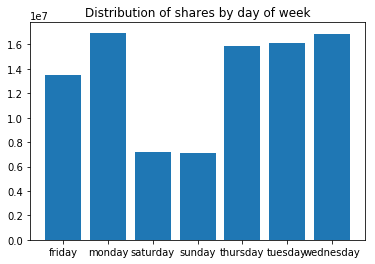

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
weekday_names = [day_of_week_column.replace(" weekday_is_", "") for day_of_week_column in day_of_week_columns]
plt.bar(weekday_names, share_by_weekday)
plt.title("Distribution of shares by day of week")

[5592887, 14892053, 12889454, 6144253, 16071719, 13340303]


Text(0.5,1,'Distribution of shares by channel')

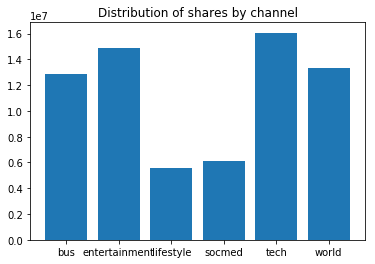

In [20]:
data_channel_columns = [" data_channel_is_lifestyle", " data_channel_is_entertainment", " data_channel_is_bus", " data_channel_is_socmed", " data_channel_is_tech", " data_channel_is_world"]
share_by_channel = [0]*len(data_channel_columns)

for idx, row in train_df.iterrows():
    for day_no, data_channel_column in enumerate(data_channel_columns):
        if row[data_channel_column] == 1:
            share_by_channel[day_no] += row["shares"]
            
print(share_by_channel)

channel_names = [data_channel_column.replace(" data_channel_is_", "") for data_channel_column in data_channel_columns]
plt.bar(channel_names, share_by_channel)
plt.title("Distribution of shares by channel")

In [18]:
data_scaler = preprocessing.MinMaxScaler()
train_data_tranformed = data_scaler.fit_transform(train_df)
target_training_transformed = data_scaler.fit_transform(target_training.reshape(-1, 1))

G:\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
G:\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [19]:
train_data_tranformed

array([[1.58565194e-01, 8.40940526e-01, 3.88888889e-01, ...,
        8.00000000e-01, 8.00000000e-01, 5.72034792e-03],
       [9.15293999e-01, 7.60719225e-02, 5.55555556e-01, ...,
        8.00000000e-01, 2.00000000e-01, 2.25438369e-03],
       [3.04795298e-01, 6.80497925e-01, 6.66666667e-01, ...,
        4.54545454e-01, 3.18181818e-01, 1.46173274e-03],
       ...,
       [5.32502586e-01, 4.24619640e-01, 3.33333333e-01, ...,
        1.00000000e+00, 1.00000000e+00, 2.70646598e-03],
       [5.71223167e-01, 3.80359613e-01, 5.55555556e-01, ...,
        1.00000000e+00, 0.00000000e+00, 6.02776388e-04],
       [2.99422344e-01, 6.87413555e-01, 3.88888889e-01, ...,
        2.00000000e-01, 4.00000000e-01, 1.65160730e-03]])

In [22]:
x_train, x_test, y_train, y_test = train_test_split(
    train_data_tranformed, target_training, train_size=0.85
)

G:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [23]:
print(x_train.shape)
print(y_train.shape)

(8500, 29)
(8500,)


In [24]:
environment.reproducible()
from neupy import algorithms, layers

cgnet = algorithms.ConjugateGradient(
    connection=[
        layers.Input(29),
        layers.Sigmoid(50),
        layers.Sigmoid(1),
    ],
    search_method='golden',
    show_epoch=25,
    verbose=True,
    addons=[algorithms.LinearSearch],
)


Main information

[ALGORITHM] ConjugateGradient

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 25
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] error = mse
[OPTION] addons = ['LinearSearch']
[OPTION] update_function = fletcher_reeves
[OPTION] maxiter = 10
[OPTION] search_method = golden
[OPTION] tol = 0.1

[THEANO] Initializing Theano variables and functions.
[THEANO] Initialization finished successfully. It took 0.75 seconds


In [ ]:
cgnet.train(x_train, y_train, x_test, y_test, epochs=50)
from neupy import plots
plots.error_plot(cgnet)


Start training

[TRAINING DATA] shapes: (8500, 29)
[TEST DATA] shapes: (1500, 29)
[TRAINING] Total epochs: 50

---------------------------------------------------------
|    Epoch    |  Train err  |  Valid err  |    Time     |
---------------------------------------------------------
|           1 |  1.4053e+08 |  1.0735e+08 |       03:38 |


In [ ]:
from neupy.estimators import rmsle

y_predict = cgnet.predict(x_test).round(1)
error = rmsle(target_scaler.inverse_transform(y_test),
              target_scaler.inverse_transform(y_predict))
print(error)